<a href="https://colab.research.google.com/github/jodogwu/Projects-Machine/blob/main/Jio_Prepaid_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing and Optimizing Jio Prepaid Data Plans**

**Link to this code**:

https://colab.research.google.com/drive/1OEhQK4oqdSQA9V7yCdpCo9LXEyA_jYMs?usp=sharing

**Project Aim**: Analysis and Optimization of Jio Prepaid Plans
Data Exploration:

**Objectives**

1) **EDA:** Clean and analyze the Jio prepaid plans dataset to identify key features and trends.

2) **Customer Segmentation:**
Segment customers using clustering algorithms based on usage patterns and preferences.

3) **Predictive Modeling:**
Develop models to forecast customer churn, usage, and plan upgrades.

4) **Pricing Optimization:**
Identify optimal price points using price elasticity models to maximize profit. Perform sensitivity analysis test

5) **Recommendations:**
Provide actionable insights and data-driven strategies for pricing and marketing optimization.

### **Data Exploration and Preprocessing**

In [ ]:
# Load dataset and inspect its structure

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
Jio = pd.read_csv('/content/drive/My Drive/Jio_prepaid.csv')

Mounted at /content/drive


In [ ]:
Jio.head()

,Days,Price,Price/Day,For 365 Days,Profit per customer,From 400 Million users,Data_per_day
0,28,209,7.464286,2724.464286,5.214286,2085.714286,1.0
1,24,179,7.458333,2722.291667,3.041667,1216.666667,1.0
2,20,149,7.450000,2719.250000,0.000000,0.000000,1.0
3,336,2545,7.574405,2764.657738,0.000000,0.000000,1.5
4,84,666,7.928571,2893.928571,129.270833,51708.333330,1.5


In [ ]:
Jio.tail()

,Days,Price,Price/Day,For 365 Days,Profit per customer,From 400 Million users,Data_per_day
11,56,533,9.517857,3474.017857,595.017857,238007.1429,2.0
12,28,299,10.678571,3897.678571,1018.678571,407471.4286,2.0
13,23,249,10.826087,3951.521739,1072.521739,429008.6957,2.0
14,84,1199,14.273810,5209.940476,0.000000,0.0000,3.0
15,28,419,14.964286,5461.964286,252.023809,100809.5238,3.0


In [ ]:
# Display the structure of the dataset
print("\nDataset Info:")
print(Jio.info())




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Days                    16 non-null     int64  
 1   Price                   16 non-null     int64  
 2   Price/Day               16 non-null     float64
 3   For 365 Days            16 non-null     float64
 4   Profit per customer     16 non-null     float64
 5   From 400 Million users  16 non-null     float64
 6   Data_per_day            16 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.0 KB
None


All data types are numerical-int64 and float64 with no missing value

In [ ]:
# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(Jio.describe())


Summary Statistics:
             Days        Price  Price/Day  For 365 Days  Profit per customer  \
count   16.000000    16.000000  16.000000     16.000000            16.000000   
mean    76.687500   663.812500   9.306167   3396.750914           306.361219   
std    109.140716   845.097645   2.320658    847.040309           345.420462   
min     14.000000   119.000000   7.450000   2719.250000             0.000000   
25%     23.750000   206.500000   7.809355   2850.414434             2.281250   
50%     28.000000   279.000000   8.544643   3118.794643           294.933036   
75%     63.000000   566.250000   9.808036   3579.933035           388.228132   
max    365.000000  2879.000000  14.964286   5461.964286          1072.521739   

       From 400 Million users  Data_per_day  
count               16.000000     16.000000  
mean            122544.487586      1.718750  
std             138168.184724      0.604669  
min                  0.000000      1.000000  
25%                912.50000

*   The average price of the data plans is 663.81, with high variability (std dev. of  845.1), range of 119 to 2,879

*   The average duration of data plan usage is approximately 76.7 days, with significant variability (standard deviation of 109.1 days) and a range from 14 to 365 days.

*   The average profit per customer is $306.36, with a significant variation indicated by high Std. Dev of 345.42 and range from 0 to 1075.42.

*   The average data consumption per day is 1.72 GB, with daily usage ranging from 1 GB to 3 GB







In [ ]:
# Check for missing values
missing_values = Jio.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Days                      0
Price                     0
Price/Day                 0
For 365 Days              0
Profit per customer       0
From 400 Million users    0
Data_per_day              0
dtype: int64


There are no missing values

In [ ]:
# Check data types
print("\nData types :\n", Jio.dtypes)


Data types :
 Days                        int64
Price                       int64
Price/Day                 float64
For 365 Days              float64
Profit per customer       float64
From 400 Million users    float64
Data_per_day              float64
dtype: object


In [ ]:
# Check for any duplicates
duplicates = Jio.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Number of duplicate rows: 0


### **Exploratory Data Analysis**

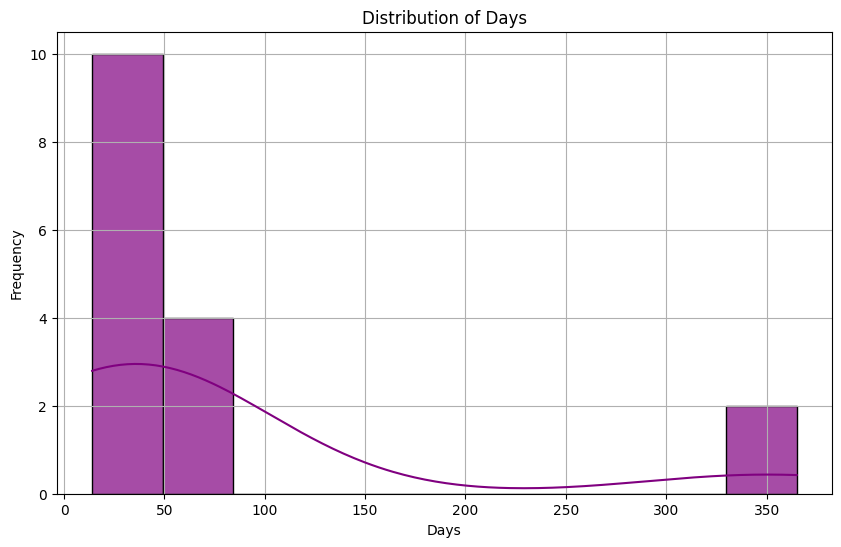

In [ ]:
# Histogram of Days
plt.figure(figsize=(10, 6))
sns.histplot(Jio['Days'], bins=10, kde=True, color='purple', alpha=0.7)
plt.title('Distribution of Days')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The highest frequency is observed for the shortest duration plans (0-50 days). This indicates that these short-term  data plans are the most popular among customers.

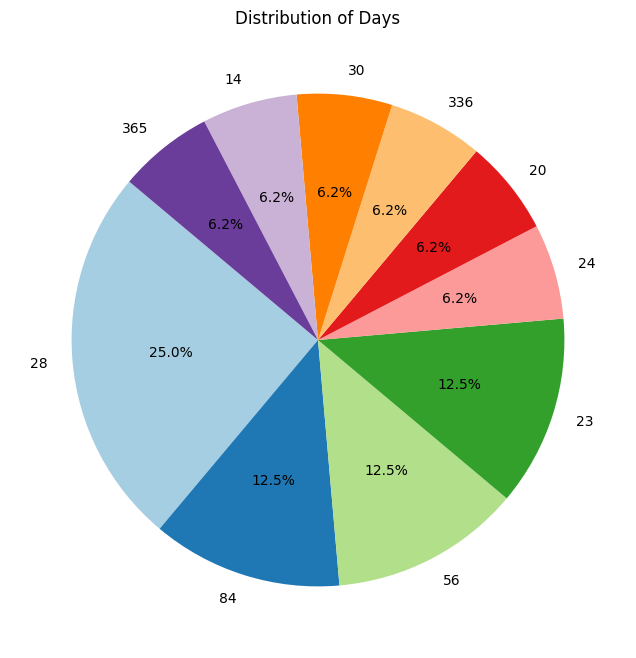

In [ ]:
# Calculate value counts for Days
days_counts = Jio['Days'].value_counts()

# Prepare data for pie chart
labels = days_counts.index.astype(str)
sizes = days_counts.values

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Days')
plt.show()

The most populous data plan is the 28-days plan with over 25% of the total data plan distribution

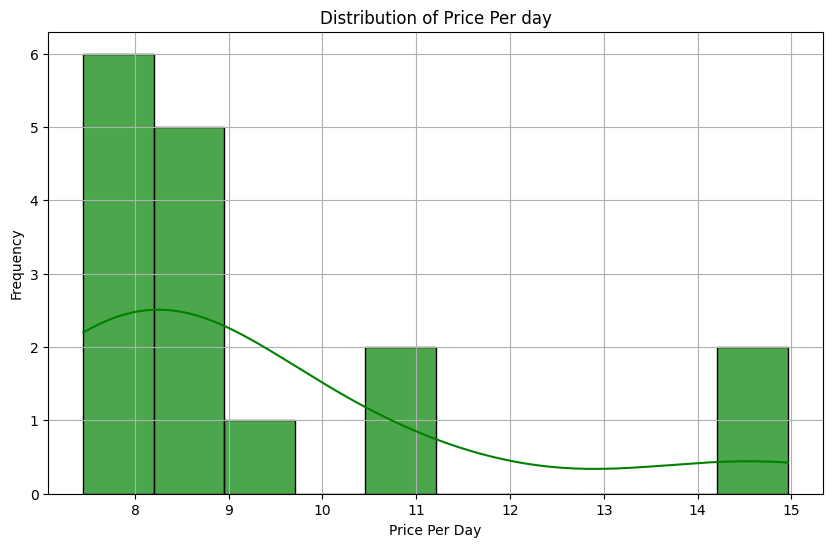

In [ ]:
# Histogram of Price Per Days
plt.figure(figsize=(10, 6))
sns.histplot(Jio['Price/Day'], bins=10, kde=True, color='green', alpha=0.7)
plt.title('Distribution of Price Per day')
plt.xlabel('Price Per Day')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The highest price per day for data plans occurs at the price range of 7-9 INR

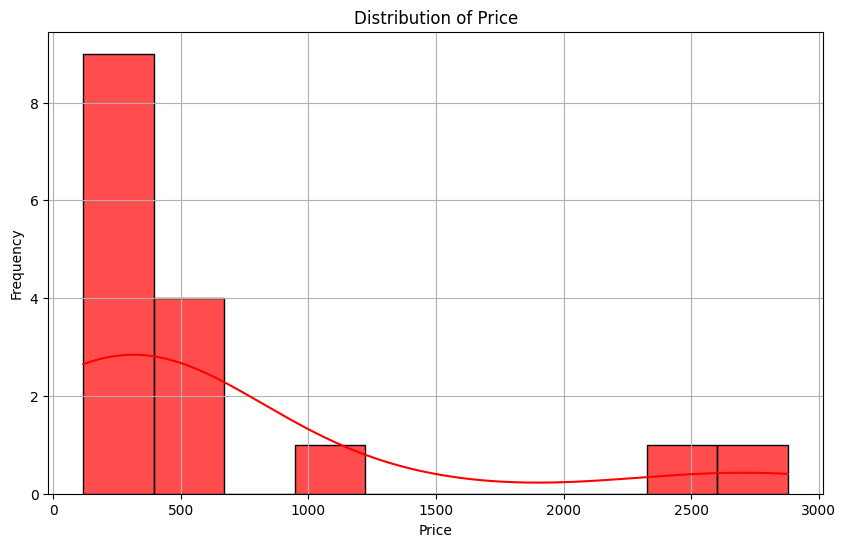

In [ ]:
# Histogram of Price
plt.figure(figsize=(10, 6))
sns.histplot(Jio['Price'], bins=10, kde=True, color='red', alpha=0.7)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Lower priced plans in the range 100-700 INR are more poular with the most populous price less than 250 INR

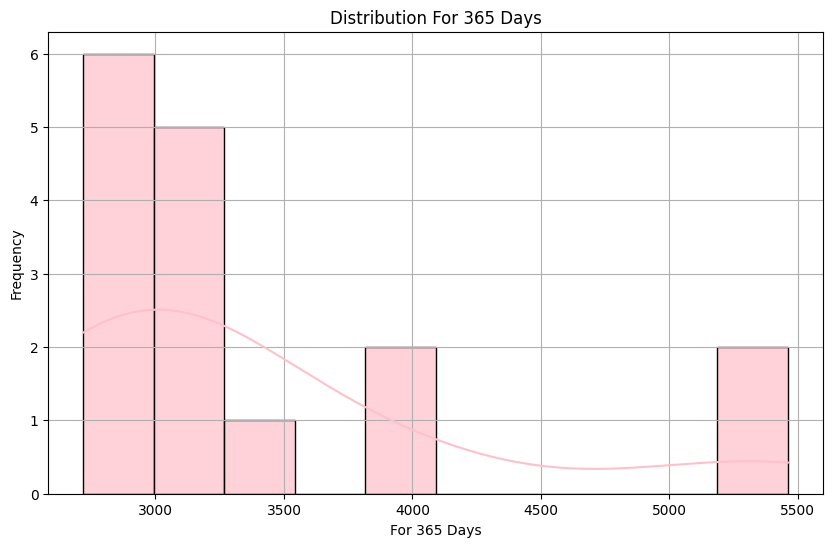

In [ ]:
# Histogram For 365 Days
plt.figure(figsize=(10, 6))
sns.histplot(Jio['For 365 Days'], bins=10, kde=True, color='pink', alpha=0.7)
plt.title('Distribution For 365 Days')
plt.xlabel('For 365 Days')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

For the projected price for the year for data plans, most customers are in the range of 2500-3250 INR

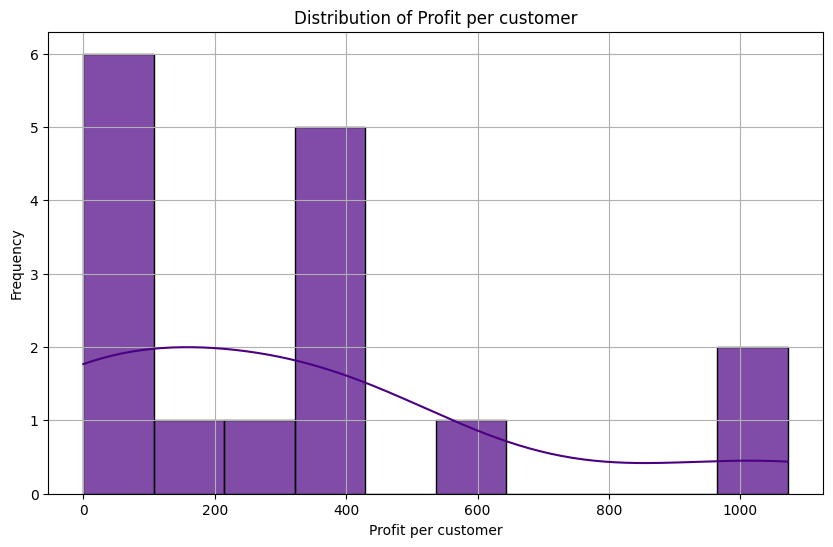

In [ ]:
# Histogram of Price
plt.figure(figsize=(10, 6))
sns.histplot(Jio['Profit per customer'], bins=10, kde=True, color='indigo', alpha=0.7)
plt.title('Distribution of Profit per customer')
plt.xlabel('Profit per customer')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

*   The highest frequencies are observed at the lower profit ranges (0-100 and around 400). Specifically, there are around 6 occurrences at the lowest profit range and another peak around 400 with approximately 5 occurrences.

*   This indicates that a significant number of customers contribute to lower profits per customer.



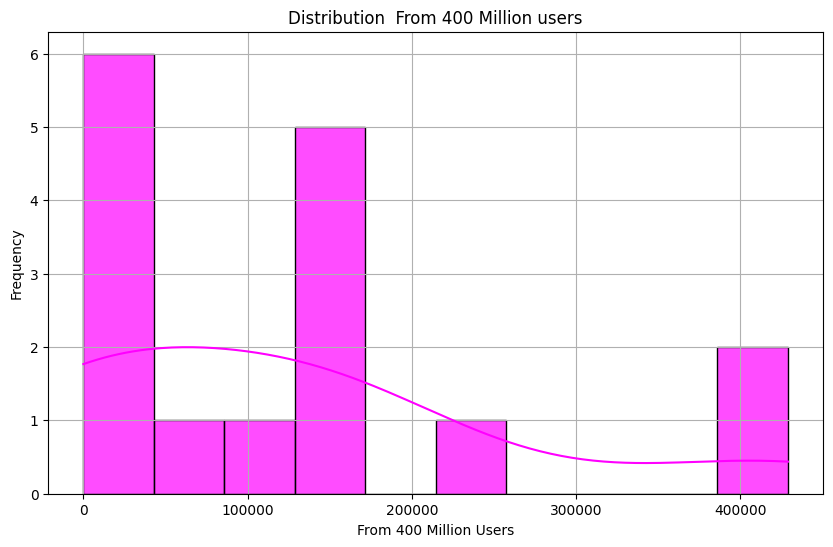

In [ ]:
# Distribution From 400 Million Users
plt.figure(figsize=(10, 6))
sns.histplot(Jio['From 400 Million users'], bins=10, kde=True, color='magenta', alpha=0.7)
plt.title('Distribution  From 400 Million users')
plt.xlabel('From 400 Million Users')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

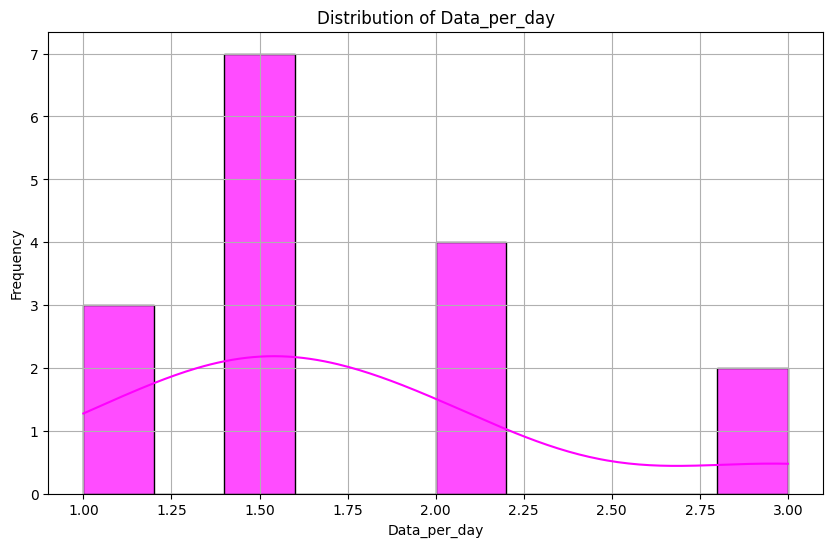

In [ ]:
# Histogram of Data_per_day
plt.figure(figsize=(10, 6))
sns.histplot(Jio['Data_per_day'], bins=10, kde=True, color='magenta', alpha=0.7)
plt.title('Distribution of Data_per_day')
plt.xlabel('Data_per_day')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The 1.5GB data plan with the highest frequency of 7 is the most populous among the customers

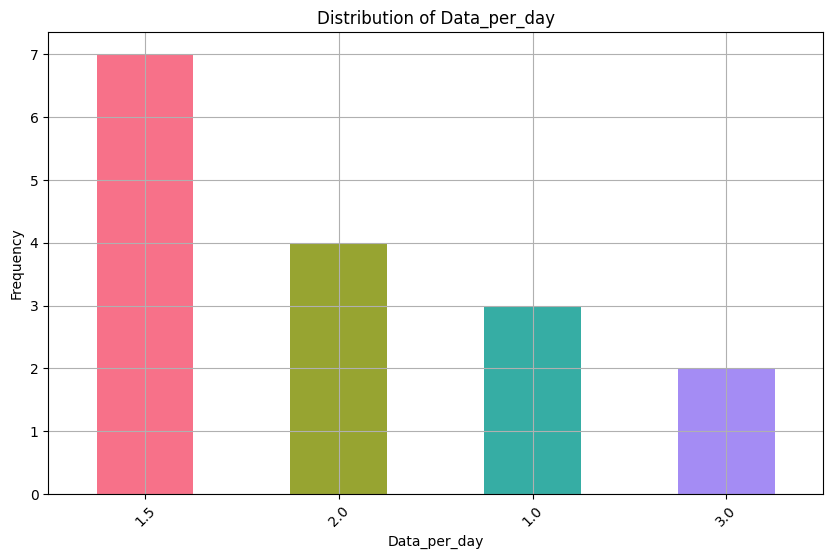

In [ ]:
# Calculate value counts for Data_per_day
data_per_day_counts = Jio['Data_per_day'].value_counts()

# Plot bar chart with colorful bars
plt.figure(figsize=(10, 6))
colors = sns.color_palette('husl', len(data_per_day_counts))  # Using 'husl' color palette
data_per_day_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Data_per_day')
plt.xlabel('Data_per_day')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()

The 1.5GB data plan is the most populous while the 3GB plan is the least populous

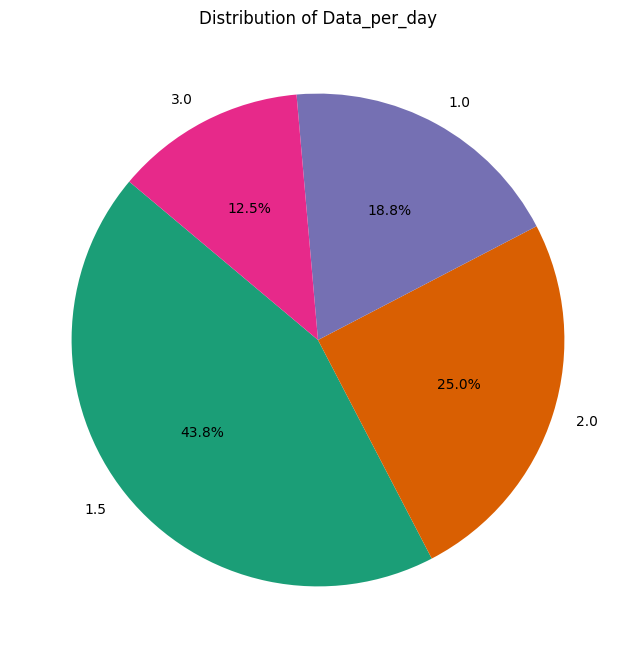

In [ ]:
# Calculate value counts for Data_per_day
data_per_day_counts = Jio['Data_per_day'].value_counts()

# Prepare data for pie chart
labels = data_per_day_counts.index.astype(str)
sizes = data_per_day_counts.values

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Dark2.colors)
plt.title('Distribution of Data_per_day')
plt.show()

The 1.5GB plan is the favorites among the customers contributing 43.8% of data subscription

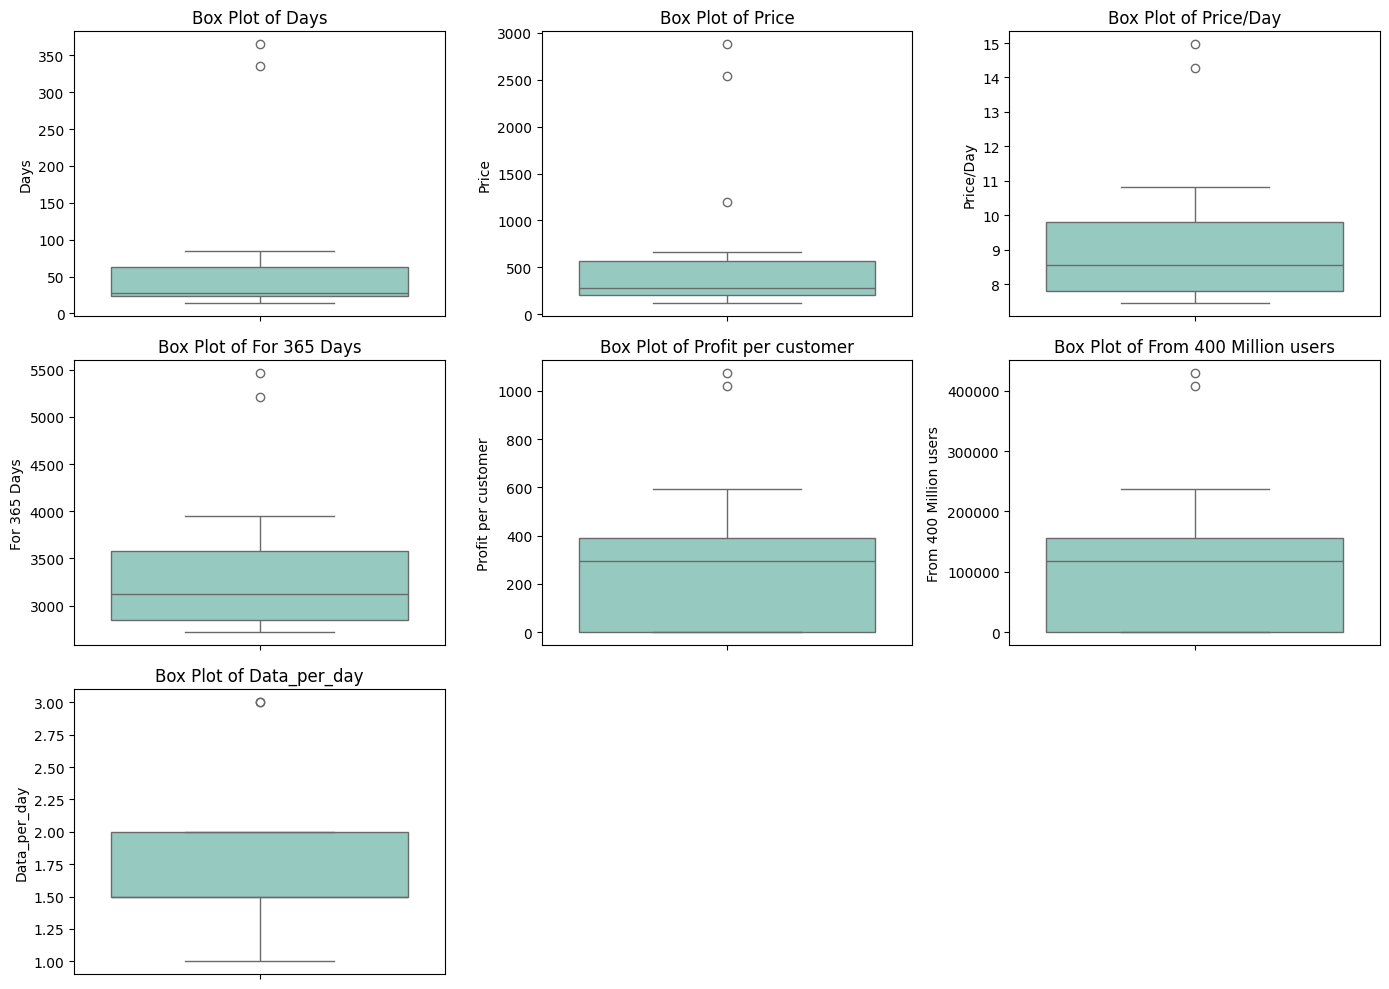

In [ ]:
# Plot box plots for each feature to understand the distribution and detect outliers
# Columns to analyze
columns_to_analyze = ['Days', 'Price', 'Price/Day', 'For 365 Days', 'Profit per customer', 'From 400 Million users', 'Data_per_day']
plt.figure(figsize=(14, 10))
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=Jio[column], palette='Set3')
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

*   Outliers observed in all variables
*   List item



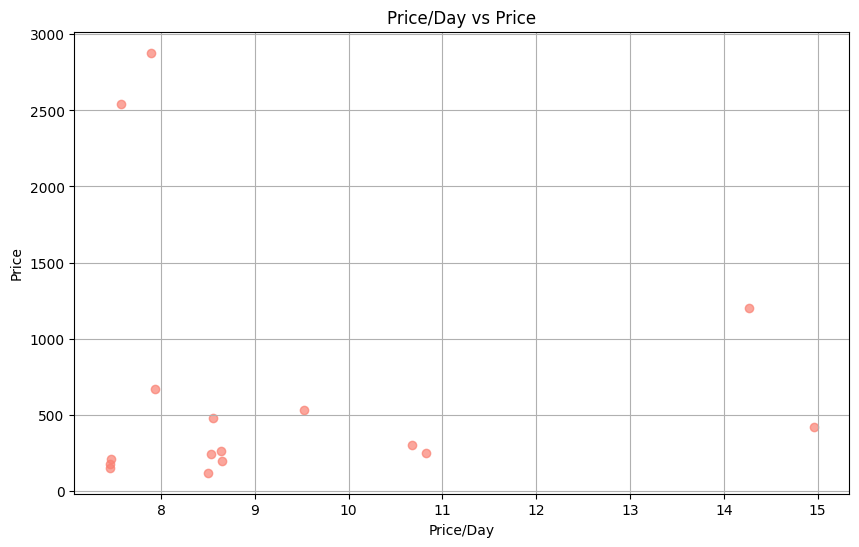

In [ ]:
# Scatter plot: Price/Day vs Price
plt.figure(figsize=(10, 6))
plt.scatter(Jio['Price/Day'], Jio['Price'], color='salmon', alpha=0.7)
plt.title('Price/Day vs Price')
plt.xlabel('Price/Day')
plt.ylabel('Price')
plt.grid(True)
plt.show()

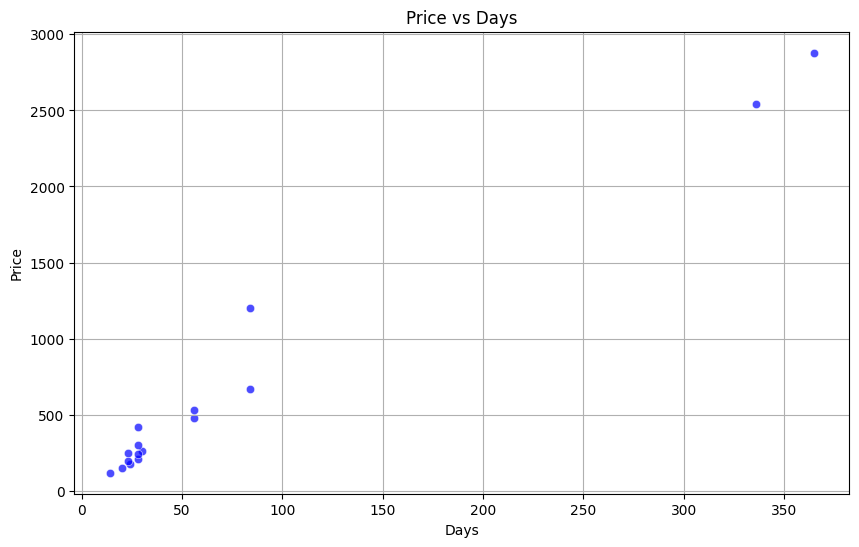

In [ ]:
# Scatter plot for Price vs Days
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days', y='Price', data=Jio, color='blue', alpha=0.7)
plt.title('Price vs Days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid(True)
plt.show()

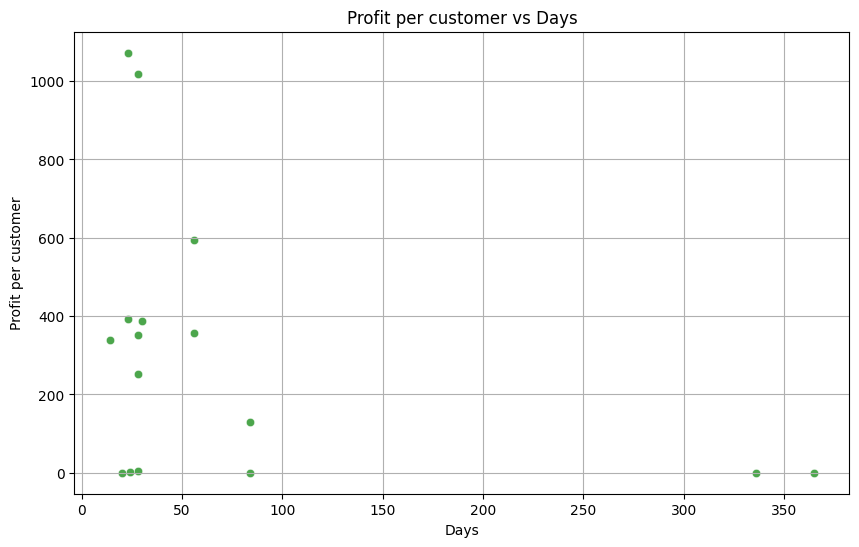

In [ ]:
# Scatter plot for Profit per customer vs Days
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days', y='Profit per customer', data=Jio, color='green', alpha=0.7)
plt.title('Profit per customer vs Days')
plt.xlabel('Days')
plt.ylabel('Profit per customer')
plt.grid(True)
plt.show()


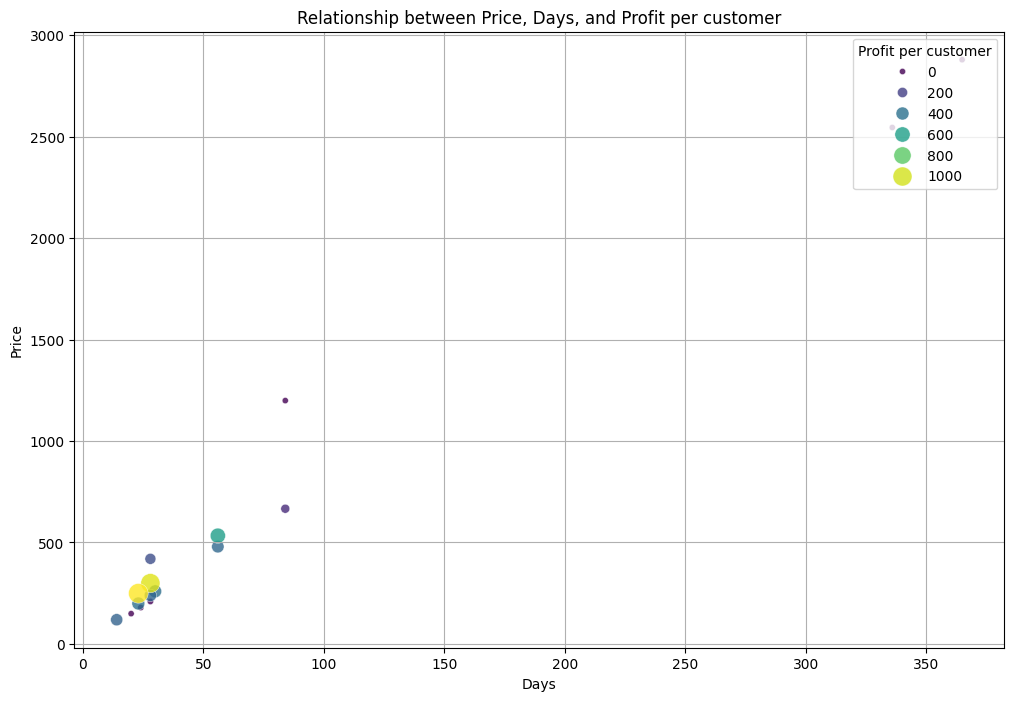

In [ ]:
# Scatter plot for Price vs Days vs Profit per customer
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Days', y='Price', size='Profit per customer', data=Jio, sizes=(20, 200), hue='Profit per customer', palette='viridis', alpha=0.8)
plt.title('Relationship between Price, Days, and Profit per customer')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend(title='Profit per customer', loc='upper right')
plt.grid(True)
plt.show()

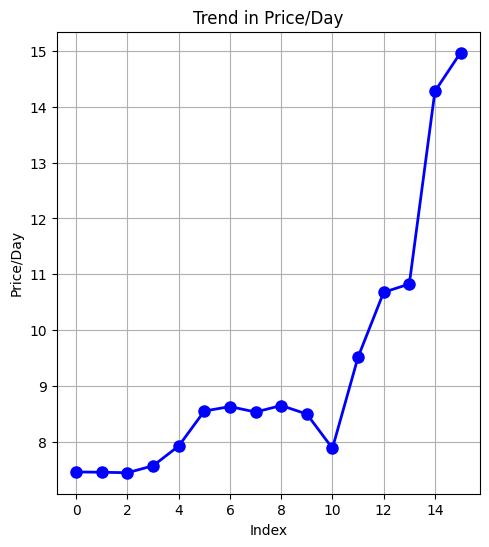

In [ ]:
# Line chart for Price/Day and For 365 Days trends
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(Jio.index, Jio['Price/Day'], marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
plt.title('Trend in Price/Day')
plt.xlabel('Index')
plt.ylabel('Price/Day')
plt.grid(True)

The chart shows a stable data plan Price/Day initially, followed by a minor increase and a dip, then a sharp rise towards the end of the period (year)

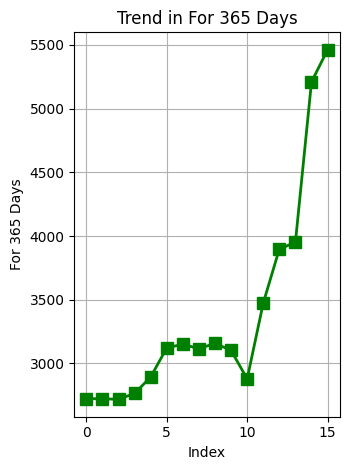

In [ ]:
# Line chart For 365 Days trend
plt.subplot(1, 2, 2)
plt.plot(Jio.index, Jio['For 365 Days'], marker='s', color='green', linestyle='-', linewidth=2, markersize=8)
plt.title('Trend in For 365 Days')
plt.xlabel('Index')
plt.ylabel('For 365 Days')
plt.grid(True)

plt.tight_layout()
plt.show()

The projected data plan  prices for 365 days shows a stable price initially, followed by a minor increase and a dip, then a sharp rise towards the end of the period (year)

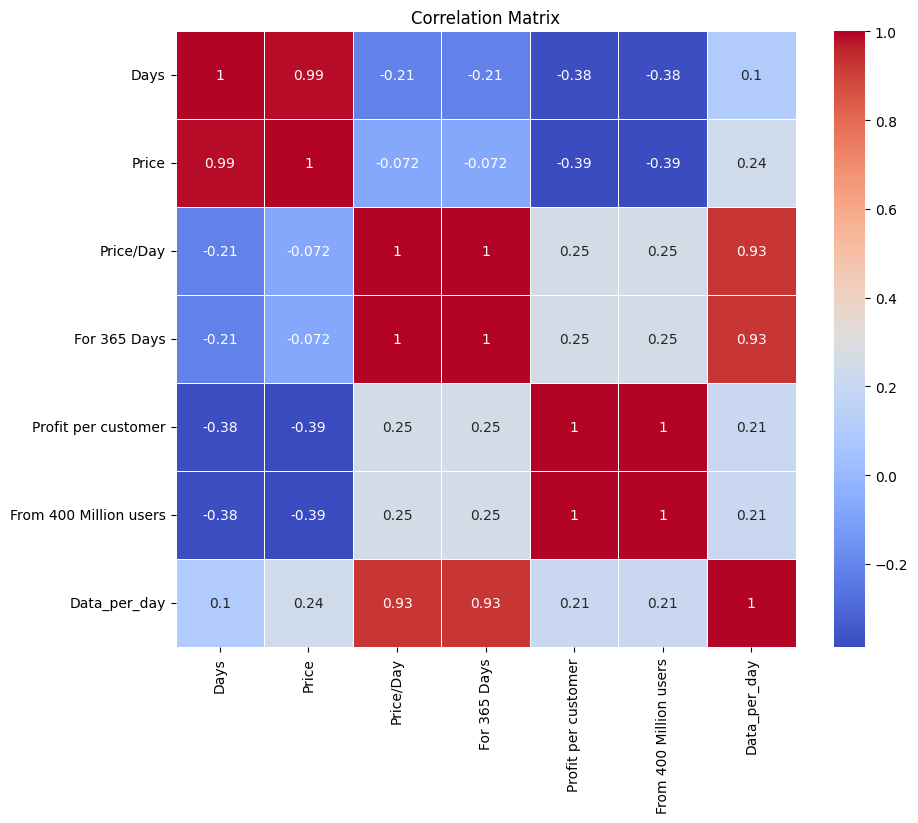

In [ ]:
# Correlation heatmap to see the correlation between different features

plt.figure(figsize=(10, 8))
correlation_matrix = Jio[columns_to_analyze].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

*   Strong Positive Correlation (0.99): Days and Price increase proportionally.
*   Moderate Negative Correlation (-0.21): More Days lead to lower Price/Day.

*  Moderate Negative Correlation (-0.38): More Days reduce Profit per Customer.
*   Perfect Positive Correlation (1): Price/Day and For 365 Days are identical.

*   Very Strong Positive Correlation (0.93): Higher Price/Day increases Data per Day.
*   Perfect Positive Correlation (1): Profit per Customer equals From 400 Million Users.

*   Moderate Negative Correlation (-0.39): Higher Prices lower Profit per Customer.










### **Customer Segmentation**

In [ ]:
# 1 Define Segmentation Criteria
# Example: Define segments based on quartiles
q1 = Jio['Data_per_day'].quantile(0.25)
q2 = Jio['Data_per_day'].quantile(0.5)
q3 = Jio['Data_per_day'].quantile(0.75)

In [ ]:
def segment_data_per_day(data_per_day):
    if data_per_day <= q1:
        return 'Low Data Usage'
    elif q1 < data_per_day <= q2:
        return 'Moderate Data Usage'
    elif q2 < data_per_day <= q3:
        return 'High Data Usage'
    else:
        return 'Very High Data Usage'

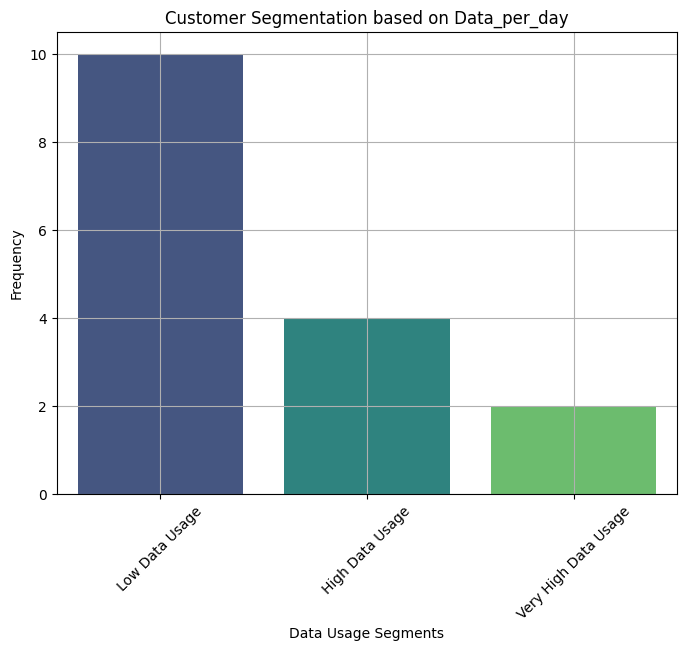

In [ ]:
# 2. Assign Segment Labels
Jio['Data_per_day_segment'] = Jio['Data_per_day'].apply(segment_data_per_day)

# 3. Visualize Segments
plt.figure(figsize=(8, 6))
sns.countplot(x='Data_per_day_segment', data=Jio, palette='viridis')
plt.title('Customer Segmentation based on Data_per_day')
plt.xlabel('Data Usage Segments')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Most customers subscribe to low data usage as against very high data usage

**Customer Segmentation using K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 1. Prepare the Data
# Selecting relevant feature for clustering
X = Jio[['Data_per_day']].values

In [ ]:
# 2. Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 3. Choose the Number of Clusters (K)
k = 3  # Example: Choose 3 clusters

In [ ]:
# 4. Apply K-means Clustering
kmeans = KMeans(n_clusters=k, random_state=42)
Jio['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# 5. Analyze Clusters
 # Back transform centers to original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

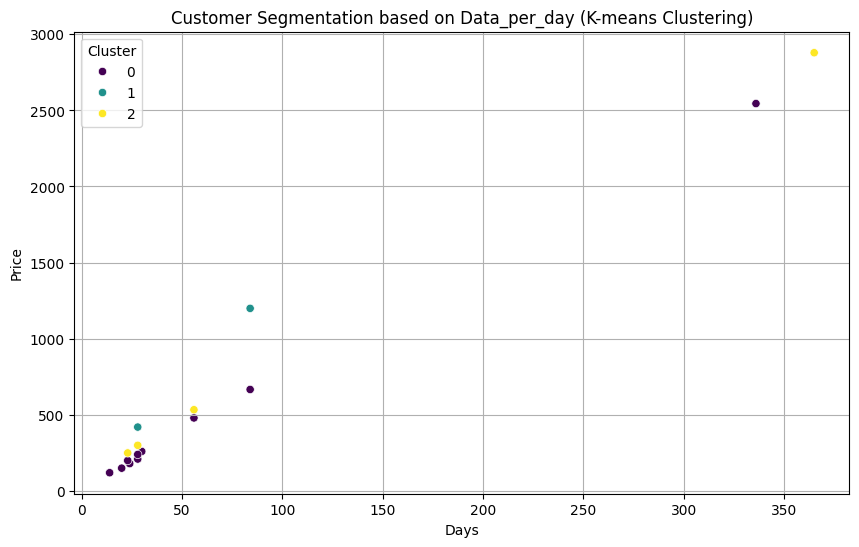

In [ ]:
# 6. Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days', y='Price', hue='Cluster', data=Jio, palette='viridis', legend='full')
plt.title('Customer Segmentation based on Data_per_day (K-means Clustering)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [ ]:
# 7. Interpret and Assign Segment Labels
Jio['Segment'] = Jio['Cluster'].map({0: 'Low Price', 1: 'High Price', 2: 'Medium Price  3'})  # Example: Assigning segment labels

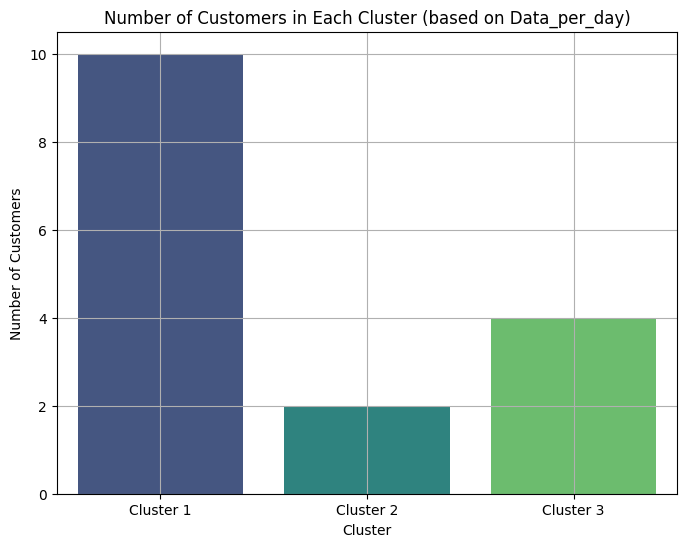

In [ ]:
# 8. Count number of customers in each cluster
cluster_counts = Jio['Cluster'].value_counts().sort_index()

# 9. Visualize Clusters by Number of Customers
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Number of Customers in Each Cluster (based on Data_per_day)')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(ticks=range(k), labels=[f'Cluster {i+1}' for i in range(k)])
plt.grid(True)
plt.show()

In [ ]:
# 10. Interpret and Assign Segment Labels
Jio['Segment'] = Jio['Cluster'].map({0: 'Low Price', 1: 'High Price', 2: 'Medium Price  3'})  # Example: Assigning segment labels

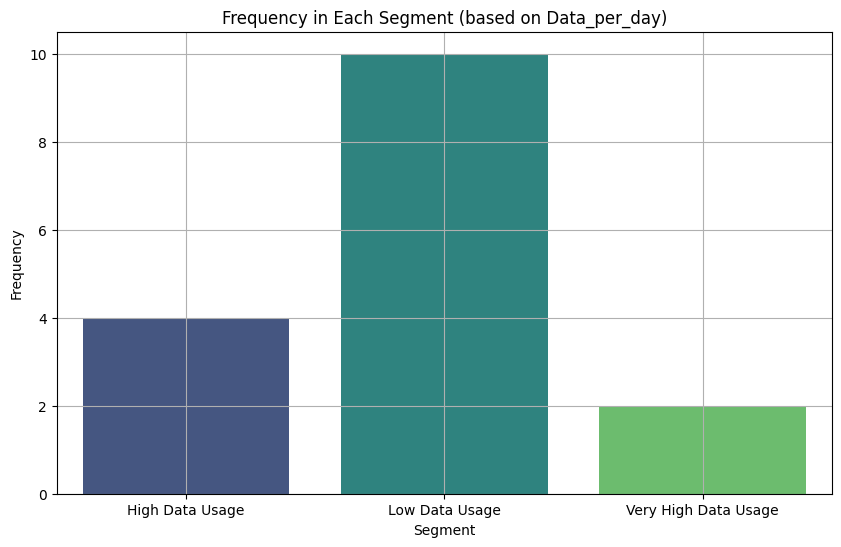

Cluster 1 center (interpreted as Low Data Usage): 1.35 GB/day
Cluster 2 center (interpreted as Very High Data Usage): 3.00 GB/day
Cluster 3 center (interpreted as High Data Usage): 2.00 GB/day


In [ ]:
# 1. Prepare the Data
X = Jio[['Data_per_day']].values  # Selecting relevant feature for clustering

# 2. Standardize the Data (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Choose the Number of Clusters (K)
k = 3  # Example: Choose 3 clusters (can be adjusted based on analysis)

# 4. Apply K-means Clustering
kmeans = KMeans(n_clusters=k, random_state=42)
Jio['Cluster'] = kmeans.fit_predict(X_scaled)

# 5. Interpret and Assign Segment Labels
cluster_labels = {0: 'Low Data Usage', 1: 'Very High Data Usage', 2: 'High Data Usage'}
Jio['Segment'] = Jio['Cluster'].map(cluster_labels)

# 6. Count number of customers in each segment
segment_counts = Jio['Segment'].value_counts().sort_index()

# 7. Visualize Clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Frequency in Each Segment (based on Data_per_day)')
plt.xlabel('Segment')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Displaying the cluster centers for reference
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1} center (interpreted as {cluster_labels[i]}): {center[0]:.2f} GB/day")

### **Pricing Strategy Analysis**

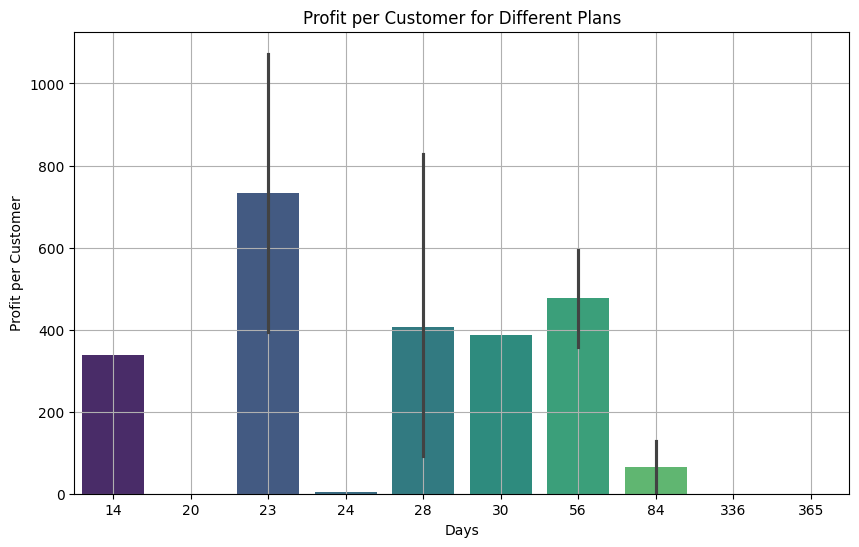

In [ ]:
# Analyze the profitability of different plans
plt.figure(figsize=(10, 6))
sns.barplot(x='Days', y='Profit per customer', data=Jio, palette='viridis')
plt.title('Profit per Customer for Different Plans')
plt.xlabel('Days')
plt.ylabel('Profit per Customer')
plt.grid(True)
plt.show()

The 28-days plan is the most profitable with profit per customer exceeding 1000 INR. The following day plans  20, 336 and 365 did not yield any profit

In [ ]:
# Calculate the Average Revenue Per User (ARPU) for each segment
arpu_per_segment = Jio.groupby('Segment')['Profit per customer'].mean().sort_values()


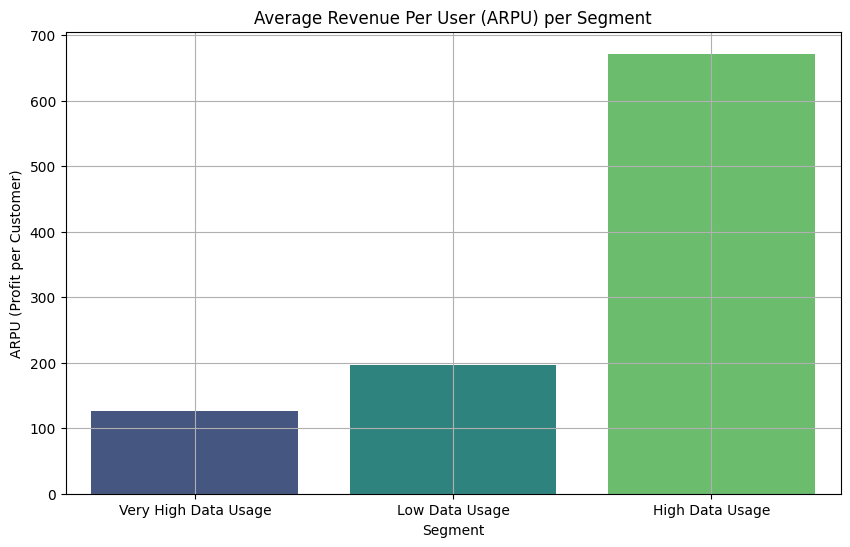

In [ ]:
# Visualize ARPU per segment
plt.figure(figsize=(10, 6))
sns.barplot(x=arpu_per_segment.index, y=arpu_per_segment.values, palette='viridis')
plt.title('Average Revenue Per User (ARPU) per Segment')
plt.xlabel('Segment')
plt.ylabel('ARPU (Profit per Customer)')
plt.grid(True)
plt.show()

Customers categorised as high data Usage constitute the highest Average Revenue Per User (ARPU) greater than 600

In [ ]:
import statsmodels.api as sm

# Prepare data for price elasticity analysis
X = Jio['Price']  # Independent variable: Price
y = Jio['Profit per customer']  # Dependent variable: Profit per customer

# Add a constant term for the intercept in the regression model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Profit per customer   R-squared:                       0.150
Model:                             OLS   Adj. R-squared:                  0.090
Method:                  Least Squares   F-statistic:                     2.478
Date:                 Sat, 29 Jun 2024   Prob (F-statistic):              0.138
Time:                         21:25:16   Log-Likelihood:                -114.40
No. Observations:                   16   AIC:                             232.8
Df Residuals:                       14   BIC:                             234.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        411.5827    106.093      3.87

In [ ]:
# Extract the price elasticity coefficient (slope)
price_elasticity = model.params['Price']
print(f"Estimated Price Elasticity: {price_elasticity:.2f}")

Estimated Price Elasticity: -0.16


*   The price elasticity of -0.16 specifically implies that a 1% increase in the price of the data plans would result in only a 0.16% decrease in the quantity demanded.

*   The small elasticity value indicates that customers are relatively less price-sensitive. They may prioritize factors like quality, service reliability, or data limits over price.



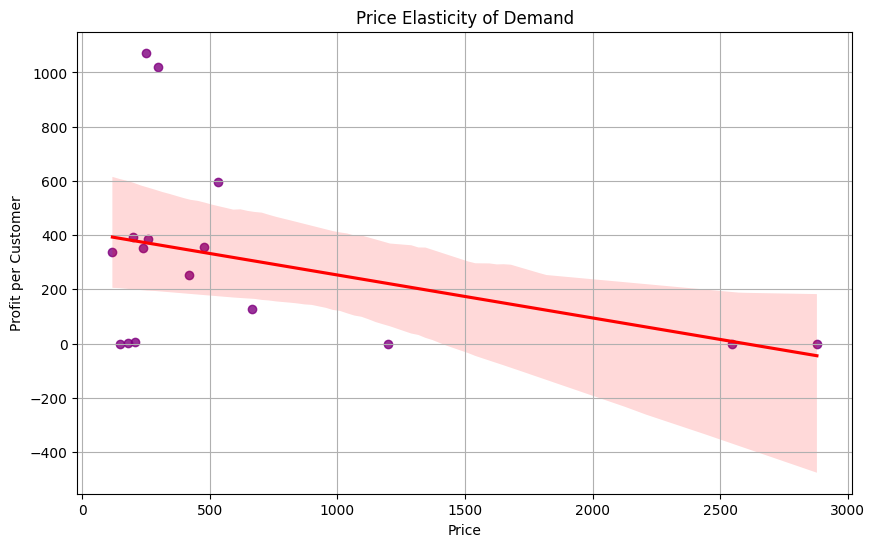

In [ ]:
# Visualize the relationship between Price and Profit per customer
plt.figure(figsize=(10, 6))
sns.regplot(x='Price', y='Profit per customer', data=Jio, color='purple', line_kws={"color": "red"})
plt.title('Price Elasticity of Demand')
plt.xlabel('Price')
plt.ylabel('Profit per Customer')
plt.grid(True)
plt.show()

The highest profit per customer are observed at lower price range of 0-500 INR

### **Predictive Modelling**

**Build a predictive model to forecast customer churn (cancel their subscription or stop using the service) based on plan attributes and usage patterns**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Define a synthetic churn column based on 'Profit per customer'
churn_threshold = 50
Jio['Churn'] = (Jio['Profit per customer'] < churn_threshold).astype(int)

In [ ]:
# Define features and target variable
features = ['Days', 'Price', 'Price/Day', 'For 365 Days', 'Profit per customer', 'Data_per_day']
target = 'Churn'

X = Jio[features]
y = Jio[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Evaluate logistic regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)

In [ ]:
# Print the evaluation results
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_log_reg:.2f}")
print(f"Precision: {precision_log_reg:.2f}")
print(f"Recall: {recall_log_reg:.2f}")
print(f"ROC-AUC: {roc_auc_log_reg:.2f}")

Logistic Regression Model Performance:
Accuracy: 0.40
Precision: 0.00
Recall: 0.00
ROC-AUC: 0.83


The Logistic Regression model shows low accuracy and fails to predict churn with zero precision and recall, despite having good discriminatory power indicated by an ROC-AUC of 0.83.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_clf.predict(X_test)
y_prob_tree = tree_clf.predict_proba(X_test)[:, 1]

# Evaluate decision tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_prob_tree)

In [ ]:
# Print the evaluation results
print("\nDecision Tree Model Performance:")
print(f"Accuracy: {accuracy_tree:.2f}")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall: {recall_tree:.2f}")
print(f"ROC-AUC: {roc_auc_tree:.2f}")


Decision Tree Model Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
ROC-AUC: 1.00


The decision tree model demonstrates perfect performance with an accuracy, precision, recall, and ROC-AUC all at 1.00, indicating that it predicts customer churn flawlessly on the training dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest model
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

# Make predictions
y_pred_forest = forest_clf.predict(X_test)
y_prob_forest = forest_clf.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate random forest model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest)
recall_forest = recall_score(y_test, y_pred_forest)
roc_auc_forest = roc_auc_score(y_test, y_prob_forest)

In [ ]:
# Print the evaluation results
print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_forest:.2f}")
print(f"Precision: {precision_forest:.2f}")
print(f"Recall: {recall_forest:.2f}")
print(f"ROC-AUC: {roc_auc_forest:.2f}")


Random Forest Model Performance:
Accuracy: 0.80
Precision: 1.00
Recall: 0.67
ROC-AUC: 1.00


In the context of customer churn prediction, the Random Forest model accurately identifies 67% of all churn cases while maintaining perfect precision, achieving an overall accuracy of 80% and demonstrating outstanding discriminatory ability with an ROC-AUC of 1.00.

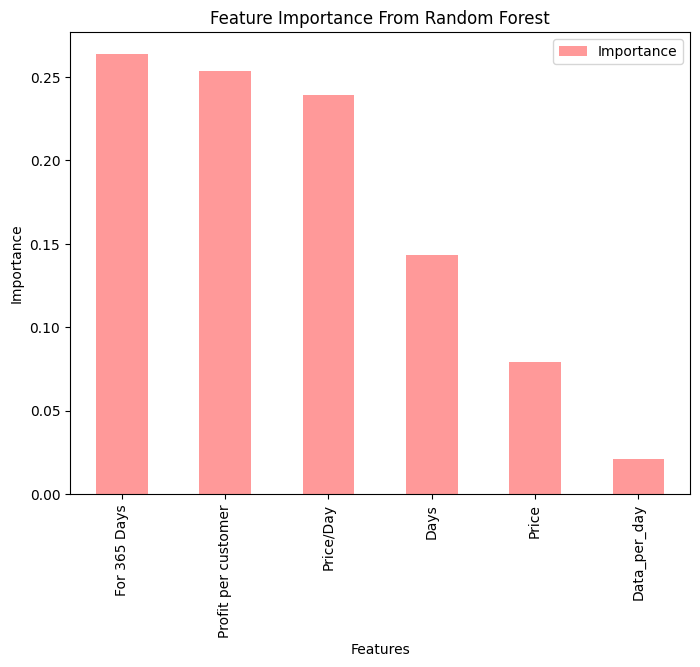

In [ ]:
# Get feature importance scores
feature_importance = forest_clf.feature_importances_

# Create a DataFrame with feature importances
feat_importances = pd.DataFrame(feature_importance, index=features, columns=["Importance"])

# Sort by importance (descending order)
feat_importances.sort_values(by="Importance", ascending=False, inplace=True)

# Define custom colors for the bars
custom_colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347']

# Plot the feature importances with custom colors
feat_importances.plot(kind="bar", figsize=(8, 6), color=custom_colors)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance From Random Forest")
plt.show()

**For 365 Days:** Highest importance score (close to 0.25). Represents the projected price for a year.

**Profit per Customer:** Slightly less important (just below 0.25). Crucial for decision-making.

**Price/Day:** Third in importance (around 0.15). Reflects daily plan price.

                 Model  Accuracy  Precision    Recall   ROC-AUC
0  Logistic Regression       0.4        0.0  0.000000  0.833333
1        Decision Tree       1.0        1.0  1.000000  1.000000
2        Random Forest       0.8        1.0  0.666667  1.000000


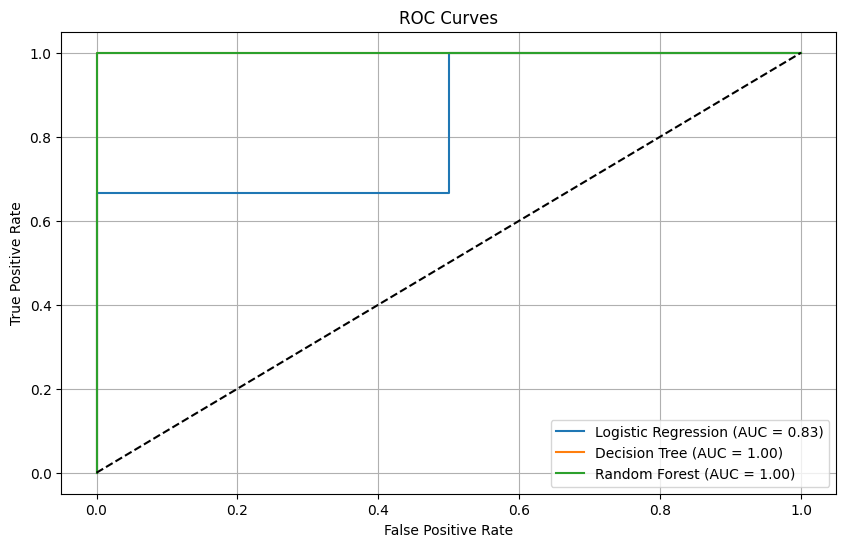

In [ ]:
# Create a DataFrame to compare model performance
performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_log_reg, accuracy_tree, accuracy_forest],
    'Precision': [precision_log_reg, precision_tree, precision_forest],
    'Recall': [recall_log_reg, recall_tree, recall_forest],
    'ROC-AUC': [roc_auc_log_reg, roc_auc_tree, roc_auc_forest]
})

print(performance)

# Plot ROC Curves
plt.figure(figsize=(10, 6))

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_prob_forest)

plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_log_reg))
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_tree))
plt.plot(fpr_forest, tpr_forest, label='Random Forest (AUC = {:.2f})'.format(roc_auc_forest))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()


*   The Decision Tree performs best overall with perfect accuracy, precision, recall, and ROC-AUC.
*   Random Forest performs well with high accuracy, perfect precision, substantial recall, and perfect ROC-AUC.

*   Logistic Regression performs poorly in terms of accuracy, precision, and recall, despite having a respectable ROC-AUC score, indicating good discriminatory power but ineffective performance in predicting churn.






### **Optimizations and Recommendations**

In [ ]:
from scipy.optimize import linprog

# Using linear programming for Optimisation
# Assume we have the following simplified profit model for different customer segments
# Let's say we have 3 segments with the following characteristics
# Segments: Low Usage, Medium Usage, High Usage

# Coefficients for the objective function (profit per customer for each segment)
profit_per_customer = np.array([10, 20, 30])  # Example profits

# Constraints
# We can only sell a certain number of plans
# For simplicity, let's assume the constraints as follows:
# The maximum number of plans that can be sold to each segment
max_plans = np.array([1000, 1500, 2000])  # Example constraints

In [ ]:
# Bounds for each variable (number of plans for each segment)
bounds = [(0, max_plans[i]) for i in range(len(max_plans))]

# Objective is to maximize profit
# Since linprog minimizes by default, we use negative profits
res = linprog(-profit_per_customer, bounds=bounds, method='highs')

# Optimal solution
optimal_plans = res.x
optimal_profit = -res.fun

print("Optimal number of plans to be sold to each segment:", optimal_plans)
print("Maximum profit:", optimal_profit)

Optimal number of plans to be sold to each segment: [1000. 1500. 2000.]
Maximum profit: 100000.0


The optimal strategy involves selling 1000 data plans to the Low Usage segment, 1500 plans to the Medium Usage segment, and 2000 plans to the High Usage segment, achieving a maximum profit of 100,000.00 INR.

### **Sensitivity Analysis**

In [ ]:
# Sensitivity Analysis
# Define a range of price changes
price_changes = np.linspace(-20, 20, 100)  # Prices change from -20% to +20%

# Store results
profits = []

In [ ]:
# Calculate profit for each price change
for change in price_changes:
    adjusted_profit = profit_per_customer * (1 + change / 100)
    res = linprog(-adjusted_profit, bounds=bounds, method='highs')
    profits.append(-res.fun)

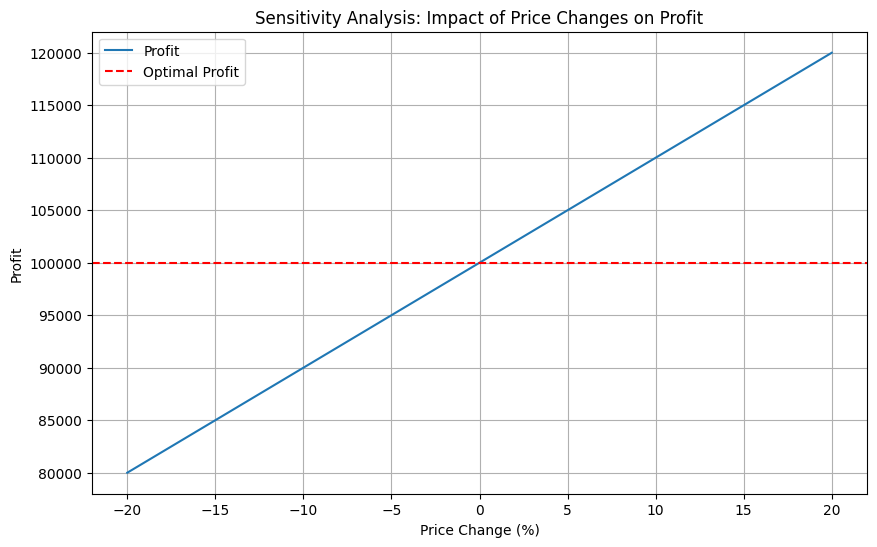

In [ ]:
# Plot sensitivity analysis
plt.figure(figsize=(10, 6))
plt.plot(price_changes, profits, label='Profit')
plt.axhline(y=optimal_profit, color='r', linestyle='--', label='Optimal Profit')
plt.xlabel('Price Change (%)')
plt.ylabel('Profit')
plt.title('Sensitivity Analysis: Impact of Price Changes on Profit')
plt.legend()
plt.grid(True)
plt.show()

The impact of price change on profit is linear: as the price increases, profit increases proportionally, and as the price decreases, profit decreases proportionally,with an optimal profit of 100,000 achieved at no price change

In [ ]:
# Recommendations
def provide_recommendations(optimal_plans, optimal_profit):
    recommendations = []

    recommendations.append(f"Optimal number of plans to be sold to each segment: {optimal_plans}")
    recommendations.append(f"Maximum profit achievable: {optimal_profit}")

    recommendations.append("Pricing Strategy Recommendations:")
    recommendations.append("1. Focus on increasing sales in the High Usage segment, as it yields the highest profit per customer.")
    recommendations.append("2. Consider offering discounts or promotions to attract more customers in the Low Usage segment.")
    recommendations.append("3. Regularly monitor and adjust prices based on market demand and competition.")
    recommendations.append("4. Invest in marketing campaigns targeting the Medium and High Usage segments to maximize profit.")

    return recommendations

recommendations = provide_recommendations(optimal_plans, optimal_profit)
for rec in recommendations:
    print(rec)

Optimal number of plans to be sold to each segment: [1000. 1500. 2000.]
Maximum profit achievable: 100000.0
Pricing Strategy Recommendations:
1. Focus on increasing sales in the High Usage segment, as it yields the highest profit per customer.
2. Consider offering discounts or promotions to attract more customers in the Low Usage segment.
3. Regularly monitor and adjust prices based on market demand and competition.
4. Invest in marketing campaigns targeting the Medium and High Usage segments to maximize profit.
